In [30]:
import pandas as pd
import os
from bs4 import BeautifulSoup
from tqdm.auto import tqdm

In [33]:
blog_files = [filename for filename in os.listdir('../blogs') if filename.endswith('.xml')]
blogs_df = pd.DataFrame(columns=['author_id', 
                                 'sex', 
                                 'age', 
                                 'occupation',
                                 'zodiac_sign',
                                 'post'])

In [35]:
def parse_name(filename):
    idx, sex, age, occupation, sign, _ = filename.split('.')
    return idx, sex, age, occupation, sign


posts_dict = {'author_id': [], 
              'sex': [], 
              'age': [], 
              'occupation': [],
              'zodiac_sign': [],
              'post': []
              }

for filename in tqdm(blog_files):
    author_id, sex, age, occupation, sign = parse_name(filename)
    
    try:
        with open('../blogs/'+filename, 'r', encoding='windows-1251') as f:
            data = f.read()
    except UnicodeDecodeError:
        with open('../blogs/'+filename, 'r', encoding='cp437') as f:
            data = f.read()
    
    bs_data = BeautifulSoup(data, "xml")
    posts = bs_data.find_all('post')

    for post in posts:
        posts_dict['author_id'].append(author_id)
        posts_dict['sex'].append(sex)
        posts_dict['age'].append(age)
        posts_dict['occupation'].append(occupation)
        posts_dict['zodiac_sign'].append(sign)
        posts_dict['post'].append(post.text)


100%|██████████| 19319/19319 [02:26<00:00, 131.45it/s]


In [36]:
posts_df = pd.DataFrame.from_dict(posts_dict)

In [37]:
posts_df.head()

,author_id,sex,age,occupation,zodiac_sign,post
0,4162441,male,16,Student,Sagittarius,\n\n\t \n DESTINY... you might n...
1,4162441,male,16,Student,Sagittarius,\n\n\t \n DEAR ANGEL.. you say it...
2,4162441,male,16,Student,Sagittarius,\n\n\t \n MAIN AUR MERI TANHAI (jagjeet s...
3,4162441,male,16,Student,Sagittarius,\n\n\t \n mail addressrs(s) urlLink http...
4,4162441,male,16,Student,Sagittarius,\n\n\t \n RAP- ALLRISE so stand back caus...


In [38]:
posts_df.tail()


,author_id,sex,age,occupation,zodiac_sign,post
659350,1883213,male,23,Manufacturing,Cancer,\n\n\t \n QUITE SOMETIME Welcome dear re...
659351,1883213,male,23,Manufacturing,Cancer,\n\n\t \n THINGS MORE IMPORTANT THAN LOOK...
659352,1883213,male,23,Manufacturing,Cancer,\n\n\t \n MOVIES ABOUT MOVIE WITH MOVIES ...
659353,1883213,male,23,Manufacturing,Cancer,\n\n\t \n MOVIES ABOUT MOVIE WITH MOVIES ...
659354,1883213,male,23,Manufacturing,Cancer,\n\n\t \n MORGAN WIXSON THEATER Eventua...


- Average relative frequency of personal 1st person pronouns in the texts
- Average number of exclamation points, question marks, ellipses, and emojis used in the texts
- The average length of the text in the blog posts

In [39]:
import spacy

nlp = spacy.load("en_core_web_sm")

from spacy.tokenizer import Tokenizer


In [50]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/chizhia1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
expressive_punct_re = "(!+|\?+|:\)+|;\)+|\.\.\.|:\(+|;\(+)"
re.findall(expressive_punct_re, "I'd love cats :)) But they are ;(( wtw?????? why.....")


[':))', ';((', '??????', '...']

In [68]:
def analyze_text(text):
    expressive_punct_re = "(!+|\?+|:\)+|;\)+|\.\.\.|:\(+|;\(+)"

    pers_pronouns = ['i', 'me', 'myself', 'mine']

    tokens = word_tokenize(text)
    token_count = len(tokens)
    sent_count = len(sent_tokenize(text))
    pron_count = 0
    punct_count = 0

    for token in tokens:
        if token.lower() in pers_pronouns:
            pron_count += 1
        
    puncts = re.findall(expressive_punct_re, text)
    punct_count = len(puncts)
        
    return [token_count, sent_count, pron_count, punct_count]


In [69]:
tqdm.pandas()

In [70]:
posts_df['all_features'] = posts_df.post.progress_apply(analyze_text)

  0%|          | 0/659355 [00:00<?, ?it/s]

100%|██████████| 659355/659355 [19:26<00:00, 565.13it/s]  


In [71]:
posts_df.head()

,author_id,sex,age,occupation,zodiac_sign,post,all_features
0,4162441,male,16,Student,Sagittarius,\n\n\t \n DESTINY... you might n...,"[169, 7, 22, 4]"
1,4162441,male,16,Student,Sagittarius,\n\n\t \n DEAR ANGEL.. you say it...,"[183, 8, 9, 0]"
2,4162441,male,16,Student,Sagittarius,\n\n\t \n MAIN AUR MERI TANHAI (jagjeet s...,"[141, 12, 0, 0]"
3,4162441,male,16,Student,Sagittarius,\n\n\t \n mail addressrs(s) urlLink http...,"[37, 1, 0, 0]"
4,4162441,male,16,Student,Sagittarius,\n\n\t \n RAP- ALLRISE so stand back caus...,"[95, 2, 5, 4]"


In [72]:
posts_df['token_count'], posts_df['sent_count'], posts_df['pron_count'], posts_df['punct_count'] = zip(*list(posts_df['all_features'].values))

In [74]:
posts_df['pron_per_sents'] = posts_df.pron_count / posts_df.sent_count
posts_df['pron_per_tokens'] = posts_df.pron_count / posts_df.token_count

posts_df['punct_per_sents'] = posts_df.punct_count / posts_df.sent_count
posts_df['punct_per_tokens'] = posts_df.punct_count / posts_df.token_count


In [75]:
posts_df.head()

,author_id,sex,age,occupation,zodiac_sign,post,all_features,token_count,sent_count,pron_count,punct_count,pron_per_sents,pron_per_tokens,punct_per_sents,punct_per_tokens
0,4162441,male,16,Student,Sagittarius,\n\n\t \n DESTINY... you might n...,"[169, 7, 22, 4]",169,7,22,4,3.142857,0.130178,0.571429,0.023669
1,4162441,male,16,Student,Sagittarius,\n\n\t \n DEAR ANGEL.. you say it...,"[183, 8, 9, 0]",183,8,9,0,1.125000,0.049180,0.000000,0.000000
2,4162441,male,16,Student,Sagittarius,\n\n\t \n MAIN AUR MERI TANHAI (jagjeet s...,"[141, 12, 0, 0]",141,12,0,0,0.000000,0.000000,0.000000,0.000000
3,4162441,male,16,Student,Sagittarius,\n\n\t \n mail addressrs(s) urlLink http...,"[37, 1, 0, 0]",37,1,0,0,0.000000,0.000000,0.000000,0.000000
4,4162441,male,16,Student,Sagittarius,\n\n\t \n RAP- ALLRISE so stand back caus...,"[95, 2, 5, 4]",95,2,5,4,2.500000,0.052632,2.000000,0.042105


<Axes: >

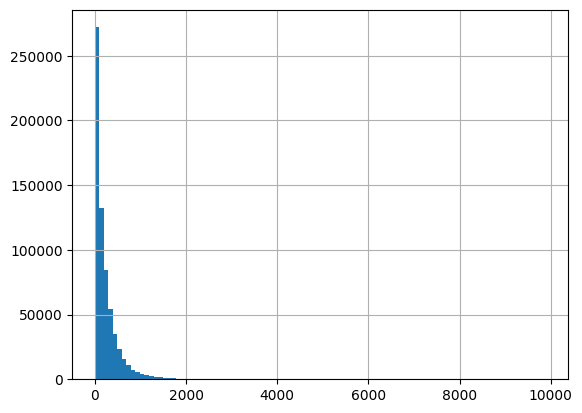

In [86]:
posts_df[posts_df.token_count < 10000].token_count.hist(bins=100)

<Axes: >

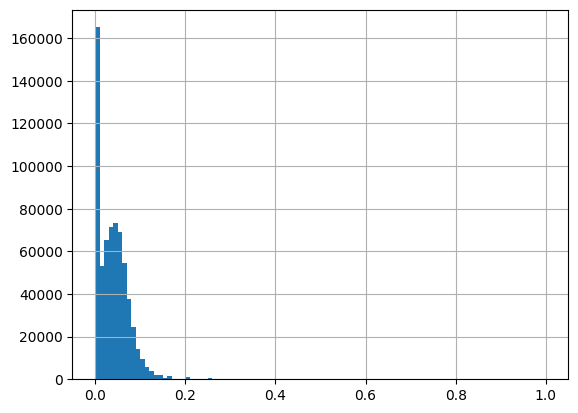

In [87]:
posts_df.pron_per_tokens.hist(bins=100)

<Axes: >

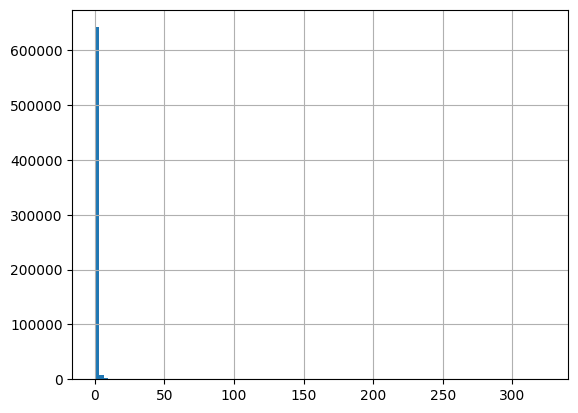

In [89]:
posts_df.punct_per_sents.hist(bins=100)